<h1> Multiplicación de Matrices </h1>

In [3]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [4]:
x = 10
matriz1 = np.random.randint(2,100,(x,x))
matriz2 = np.random.randint(2,100,(x,x))
print matriz1

[[79  7 80 89 87 59 24 68 34 85]
 [ 7 12 21 61 80 60 80 54 31 65]
 [80 40 84 59 48  3 24 59 64 52]
 [11 18 99 10 13 63  6 84 24 33]
 [83  8 62 52 22 13  4 21 80 93]
 [70 14 93 12 63 71 36 66 55 34]
 [23 50 24 81 34 44 74 25 52 15]
 [80 63 91 45 92 17 17 81 97 91]
 [41 62  2 47 20 15 45 74 96 87]
 [87 47 93 62 15 40 28 32 72 28]]


<h2> Primera multiplicación c_{ij} = \sum_{k=1}^n a_{ik}*b_{kj} </h2>

In [5]:
def mult1(mat1,mat2, x):
    mat3 = np.zeros((x,x))
    for i in range(x):
        for j in range(x):
            for k in range(x):
                mat3[i][j] = mat3[i][j] + (mat1[i][k]*mat2[k][j])
    return mat3

In [6]:
x = 3
matriz1 = np.random.randint(0,50,(x,x))
matriz2 = np.random.randint(0,50,(x,x))
mult1(matriz1,matriz2,x)

array([[  729.,   603.,  1044.],
       [ 2199.,  1827.,  1796.],
       [ 1365.,  1788.,  1843.]])

In [7]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def cont_mult1(mat1,mat2, x,acct):
    mat3 = np.zeros((x,x))
    acct.count()
    for i in range(x):
        acct.count()
        for j in range(x):
            acct.count()
            for k in range(x):
                acct.count()
                mat3[i][j] = mat3[i][j] + (mat1[i][k]*mat2[k][j]);acct.count();acct.count()
    return mat3

In [32]:
x = 200
matriz1 = np.random.randint(0,50,(x,x))
matriz2 = np.random.randint(0,50,(x,x))
acct = Counter()
cont_mult1(matriz1,matriz2,x,acct)
acct.print_steps()

Number of steps = 24040201


In [9]:
def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        matriz1 = np.random.randint(0,50,(i,i))
        matriz2 = np.random.randint(0,50,(i,i))
        acct.reset()
        cont_mult1(matriz1,matriz2,i,acct)
        results.append(acct.steps)
    print results
    return results

In [10]:
print exper_analysis(15)

[1, 6, 31, 94, 213, 406, 691, 1086, 1609, 2278, 3111, 4126, 5341, 6774, 8443]
[1, 6, 31, 94, 213, 406, 691, 1086, 1609, 2278, 3111, 4126, 5341, 6774, 8443]


[1, 6, 31, 94, 213, 406, 691, 1086, 1609, 2278, 3111, 4126, 5341, 6774, 8443, 10366, 12561, 15046, 17839, 20958, 24421, 28246, 32451, 37054, 42073, 47526, 53431, 59806, 66669, 74038]


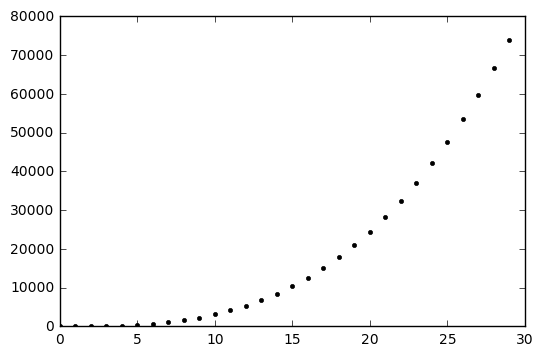

In [11]:
pl.clf()
x = np.arange(30)
y = np.array(exper_analysis(30))
pl.plot(x, y, 'k.')

<h2>Dividir y Conquistar</h2>

In [12]:
def suma(matA,matB):
    x = len(matA)
    matC = np.zeros((x,x))
    for i in range(x):
        for j in range(x):
            matC[i][j] = matA[i][j] + matB[i][j]
    return matC
            

In [13]:
def mult2(matrixA, matrixB):
    bandera=0
    if (len(matrixA) <= 2):
         return mult1(matrixA,matrixB, len(matrixA))
    else :
        tama=len(matrixA)
        if(tama%2!=0):
            m = np.zeros((tama, 1))
            n = np.zeros((1, tama+1))
            matrixA = np.c_[matrixA,m]
            matrixA = np.r_[matrixA,n]
            matrixB = np.c_[matrixB,m]
            matrixB = np.r_[matrixB,n]
            tama=tama+1    
            bandera=1 
        tama= (tama)/2
        a11=matrixA[:tama,:tama]
        a12=matrixA[:tama,tama:]
        a21=matrixA[tama:,:tama]
        a22=matrixA[tama:,tama:]
        b11=matrixB[:tama,:tama]
        b12=matrixB[:tama,tama:]
        b21=matrixB[tama:,:tama]
        b22=matrixB[tama:,tama:]
        
    c11a = mult2(a11,b11)
    c11b = mult2(a12,b21)
    c12a = mult2(a11,b12)
    c12b = mult2(a12,b22)
    c21a = mult2(a21,b11)
    c21b = mult2(a22,b21)
    c22a = mult2(a21,b12)
    c22b = mult2(a22,b22)

    c11 = suma(c11a,c11b)
    c12 = suma(c12a,c12b)
    c21 = suma(c21a,c21b)
    c22 = suma(c22a,c22b)

    c11 = np.c_[c11,c12]
    c21 = np.c_[c21,c22]
    c11 = np.r_[c11,c21]
    if bandera==1:
        ta=len(c11)
        c11 = c11[:ta-1,:ta-1]
    return c11
            


In [14]:
x = 6
matriz1 = np.random.randint(0,50,(x,x))
matriz2 = np.random.randint(0,50,(x,x))
print mult2(matriz1,matriz2)

[[ 1519.  3632.  2876.  2082.  3532.  2060.]
 [ 1016.  3110.  3005.  2609.  2350.  1555.]
 [ 3344.  6190.  4973.  2941.  5220.  3215.]
 [ 2409.  5137.  5066.  3074.  4100.  3072.]
 [ 2626.  5867.  4939.  3773.  5029.  3453.]
 [ 1154.  2705.  1891.  1135.  2493.  1312.]]


In [15]:
def cont_suma(matA,matB,acct):
    x = len(matA);acct.count()
    matC = np.zeros((x,x));acct.count()
    for i in range(x):
        acct.count()
        for j in range(x):
            acct.count()
            matC[i][j] = matA[i][j] + matB[i][j];acct.count()
    return matC

In [16]:
def cont_mult2(matrixA, matrixB,acct):
    bandera=0;acct.count()
    if (len(matrixA) <= 2):
         return cont_mult1(matrixA,matrixB, len(matrixA),acct)
    else :
        acct.count()
        tama=len(matrixA);acct.count()
        if(tama%2!=0):
            acct.count()
            m = np.zeros((tama, 1));acct.count()
            n = np.zeros((1, tama+1));acct.count()
            matrixA = np.c_[matrixA,m];acct.count()
            matrixA = np.r_[matrixA,n];acct.count()
            matrixB = np.c_[matrixB,m];acct.count()
            matrixB = np.r_[matrixB,n];acct.count()
            tama=tama+1;acct.count()
            bandera=1 ;acct.count()
        tama= (tama)/2;acct.count()
        a11=matrixA[:tama,:tama];acct.count()
        a12=matrixA[:tama,tama:];acct.count()
        a21=matrixA[tama:,:tama];acct.count()
        a22=matrixA[tama:,tama:];acct.count()
        b11=matrixB[:tama,:tama];acct.count()
        b12=matrixB[:tama,tama:];acct.count()
        b21=matrixB[tama:,:tama];acct.count()
        b22=matrixB[tama:,tama:];acct.count()
        
    c11a = cont_mult2(a11,b11,acct);acct.count()
    c11b = cont_mult2(a12,b21,acct);acct.count()
    c12a = cont_mult2(a11,b12,acct);acct.count()
    c12b = cont_mult2(a12,b22,acct);acct.count()
    c21a = cont_mult2(a21,b11,acct);acct.count()
    c21b = cont_mult2(a22,b21,acct);acct.count()
    c22a = cont_mult2(a21,b12,acct);acct.count()
    c22b = cont_mult2(a22,b22,acct);acct.count()

    c11 = cont_suma(c11a,c11b,acct);acct.count()
    c12 = cont_suma(c12a,c12b,acct);acct.count()
    c21 = cont_suma(c21a,c21b,acct);acct.count()
    c22 = cont_suma(c22a,c22b,acct);acct.count()

    c11 = np.c_[c11,c12];acct.count()
    c21 = np.c_[c21,c22];acct.count()
    c11 = np.r_[c11,c21];acct.count()
    if bandera==1:
        acct.count()
        ta=len(c11);acct.count()
        c11 = c11[:ta-1,:ta-1];acct.count()
    return c11

In [17]:
x = 15
matriz1 = np.random.randint(0,50,(x,x))
matriz2 = np.random.randint(0,50,(x,x))
acct = Counter()
cont_mult2(matriz1,matriz2,acct)
acct.print_steps()

Number of steps = 23207


In [18]:
def exper_analysis2(n):
    results = []
    acct = Counter()
    for i in range(n):
        matriz1 = np.random.randint(0,50,(i,i))
        matriz2 = np.random.randint(0,50,(i,i))
        acct.reset()
        cont_mult2(matriz1,matriz2,acct)
        results.append(acct.steps)
    return results

In [19]:
print exper_analysis2(15)

[2, 7, 32, 343, 331, 2875, 2863, 2839, 2827, 23267, 23255, 23263, 23251, 23179, 23167]


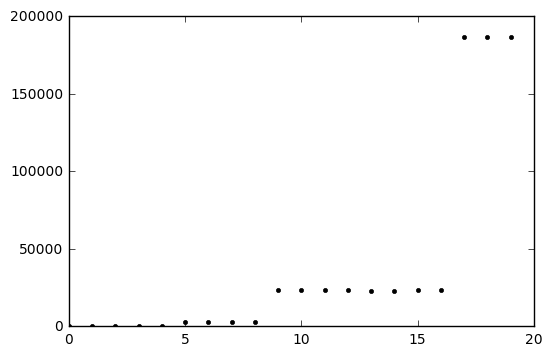

In [20]:
pl.clf()
x = np.arange(20)
y = np.array(exper_analysis2(20))
pl.plot(x, y, 'k.')

<h2>Algorítmo de Strassen</h2>

In [21]:
def resta(matA,matB):
    x = len(matA)
    matC = np.zeros((x,x))
    for i in range(x):
        for j in range(x):
            matC[i][j] = matA[i][j] - matB[i][j]
    return matC

def cont_resta(matA,matB,acct):
    x = len(matA);acct.count()
    matC = np.zeros((x,x));acct.count()
    for i in range(x):
        acct.count()
        for j in range(x):
            acct.count()
            matC[i][j] = matA[i][j] - matB[i][j];acct.count()
    return matC

In [22]:
def mult3(matrixA, matrixB):
    bandera=0
    if (len(matrixA) <= 2):
         return mult1(matrixA,matrixB, len(matrixA))
    else :
        tama=len(matrixA)
        if(tama%2!=0):
            m = np.zeros((tama, 1))
            n = np.zeros((1, tama+1))
            matrixA = np.c_[matrixA,m]
            matrixA = np.r_[matrixA,n]
            matrixB = np.c_[matrixB,m]
            matrixB = np.r_[matrixB,n]
            tama=tama+1    
            bandera=1 
        tama= (tama)/2
        a11=matrixA[:tama,:tama]
        a12=matrixA[:tama,tama:]
        a21=matrixA[tama:,:tama]
        a22=matrixA[tama:,tama:]
        b11=matrixB[:tama,:tama]
        b12=matrixB[:tama,tama:]
        b21=matrixB[tama:,:tama]
        b22=matrixB[tama:,tama:]
        
    m1a = suma(a11,a22)
    m1b = suma(b11,b22)
    m1  = mult3(m1a,m1b)
    m2a = suma(a21,a22)
    m2  = mult3(m2a,b11)
    m3a = resta(b12,b22)
    m3  = mult3(a11,m3a)
    m4a = resta(b21,b11)
    m4  = mult3(a22,m4a)
    m5a = suma(a11,a12)
    m5 = mult3(m5a,b22)
    m6a = resta(a21,a11)
    m6b = suma(b11,b12)
    m6 = mult3(m6a,m6b)
    m7a = resta(a12,a22)
    m7b = suma(b21,b22)
    m7 = mult3(m7a,m7b)

    c11 = suma(m1,m4)
    c11 = resta(c11,m5)
    c11 = suma(c11,m7)
    c12 = suma(m3,m5)
    c21 = suma(m2,m4)
    c22 = resta(m1,m2)
    c22 = suma(c22,m3)
    c22 = suma(c22,m6)

    c11 = np.c_[c11,c12]
    c21 = np.c_[c21,c22]
    c11 = np.r_[c11,c21]
    if bandera==1:
        ta=len(c11)
        c11 = c11[:ta-1,:ta-1]
    return c11

In [23]:
x = 3
matriz1 = np.random.randint(0,50,(x,x))
matriz2 = np.random.randint(0,50,(x,x))
print mult3(matriz1,matriz2)

[[ 2424.  1768.   578.]
 [ 3789.  3069.   932.]
 [ 2024.   736.   580.]]


In [24]:
def cont_mult3(matrixA, matrixB,acct):
    bandera=0;acct.count()
    if (len(matrixA) <= 2):
        acct.count()
        return cont_mult1(matrixA,matrixB, len(matrixA),acct)
    else :
        acct.count()
        tama=len(matrixA);acct.count()
        if(tama%2!=0):
            acct.count()
            m = np.zeros((tama, 1));acct.count()
            n = np.zeros((1, tama+1));acct.count()
            matrixA = np.c_[matrixA,m];acct.count()
            matrixA = np.r_[matrixA,n];acct.count()
            matrixB = np.c_[matrixB,m];acct.count()
            matrixB = np.r_[matrixB,n];acct.count()
            tama=tama+1    ;acct.count()
            bandera=1 ;acct.count()
        tama= (tama)/2;acct.count()
        a11=matrixA[:tama,:tama];acct.count()
        a12=matrixA[:tama,tama:];acct.count()
        a21=matrixA[tama:,:tama];acct.count()
        a22=matrixA[tama:,tama:];acct.count()
        b11=matrixB[:tama,:tama];acct.count()
        b12=matrixB[:tama,tama:];acct.count()
        b21=matrixB[tama:,:tama];acct.count()
        b22=matrixB[tama:,tama:];acct.count()
        
    m1a = cont_suma(a11,a22,acct);acct.count()
    m1b = cont_suma(b11,b22,acct);acct.count()
    m1  = cont_mult3(m1a,m1b,acct);acct.count()
    m2a = cont_suma(a21,a22,acct);acct.count()
    m2  = cont_mult3(m2a,b11,acct);acct.count()
    m3a = cont_resta(b12,b22,acct);acct.count()
    m3  = cont_mult3(a11,m3a,acct);acct.count()
    m4a = cont_resta(b21,b11,acct);acct.count()
    m4  = cont_mult3(a22,m4a,acct);acct.count()
    m5a = cont_suma(a11,a12,acct);acct.count()
    m5 = cont_mult3(m5a,b22,acct);acct.count()
    m6a = cont_resta(a21,a11,acct);acct.count()
    m6b = cont_suma(b11,b12,acct);acct.count()
    m6 = cont_mult3(m6a,m6b,acct);acct.count()
    m7a = cont_resta(a12,a22,acct);acct.count()
    m7b = cont_suma(b21,b22,acct);acct.count()
    m7 = cont_mult3(m7a,m7b,acct);acct.count()

    c11 = cont_suma(m1,m4,acct);acct.count()
    c11 = cont_resta(c11,m5,acct);acct.count()
    c11 = cont_suma(c11,m7,acct);acct.count()
    c12 = cont_suma(m3,m5,acct);acct.count()
    c21 = cont_suma(m2,m4,acct);acct.count()
    c22 = cont_resta(m1,m2,acct);acct.count()
    c22 = cont_suma(c22,m3,acct);acct.count()
    c22 = cont_suma(c22,m6,acct);acct.count()

    c11 = np.c_[c11,c12];acct.count()
    c21 = np.c_[c21,c22];acct.count()
    c11 = np.r_[c11,c21];acct.count()
    if bandera==1:
        acct.count()
        ta=len(c11);acct.count()
        c11 = c11[:ta-1,:ta-1];acct.count()
    return c11

In [34]:
x = 300
matriz1 = np.random.randint(0,50,(x,x))
matriz2 = np.random.randint(0,50,(x,x))
acct = Counter()
cont_mult3(matriz1,matriz2,acct)
acct.print_steps()

Number of steps = 502402025


In [26]:
def exper_analysis3(n):
    results = []
    acct = Counter()
    for i in range(n):
        matriz1 = np.random.randint(0,50,(i,i))
        matriz2 = np.random.randint(0,50,(i,i))
        acct.reset()
        cont_mult3(matriz1,matriz2,acct)
        results.append(acct.steps)
    return results

In [27]:
print exper_analysis3(15)

[3, 8, 33, 499, 487, 3959, 3947, 4145, 4133, 28791, 28779, 29121, 29109, 30993, 30981]


[1, 6, 31, 94, 213, 406, 691, 1086, 1609, 2278, 3111, 4126, 5341, 6774, 8443, 10366, 12561, 15046, 17839, 20958, 24421, 28246, 32451, 37054, 42073, 47526, 53431, 59806, 66669, 74038, 81931, 90366, 99361, 108934, 119103, 129886, 141301, 153366, 166099, 179518, 193641, 208486, 224071, 240414, 257533, 275446, 294171, 313726, 334129, 355398, 377551, 400606, 424581, 449494, 475363, 502206, 530041, 558886, 588759, 619678, 651661, 684726, 718891, 754174, 790593, 828166, 866911, 906846, 947989, 990358, 1033971, 1078846, 1125001, 1172454, 1221223, 1271326, 1322781, 1375606, 1429819, 1485438, 1542481, 1600966, 1660911, 1722334, 1785253, 1849686, 1915651, 1983166, 2052249, 2122918, 2195191, 2269086, 2344621, 2421814, 2500683, 2581246, 2663521, 2747526, 2833279, 2920798, 3010101, 3101206, 3194131, 3288894, 3385513, 3484006, 3584391, 3686686, 3790909, 3897078, 4005211, 4115326, 4227441, 4341574, 4457743, 4575966, 4696261, 4818646, 4943139, 5069758, 5198521, 5329446, 5462551, 5597854, 5735373, 58751

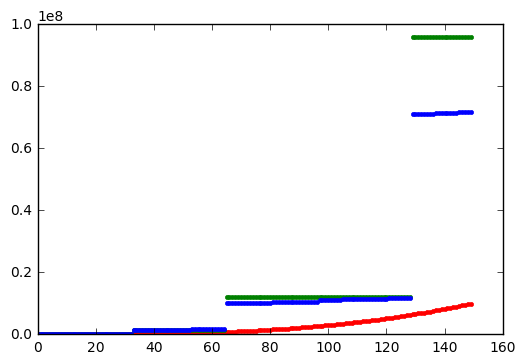

In [36]:
pl.clf()
x = np.arange(150)
y = np.array(exper_analysis(150))
pl.plot(x, y, 'k.',color='red')  #De color rojo es el primer algorítmos
y = np.array(exper_analysis2(150))
pl.plot(x, y, 'k.',color='green') #En verde está divide y venceras
y = np.array(exper_analysis3(150))
pl.plot(x, y, 'k.',color='blue') #En azul está el algoritmo de Strassen